<a href="https://colab.research.google.com/github/JavZon/Course_WM/blob/main/Task_0101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/laptop_price - dataset.csv')
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [6]:
df.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


**Company**

In [7]:
df['Company'].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,152
Acer,101
MSI,54
Toshiba,48
Apple,21
Samsung,9


In [8]:
df.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94


**TypeName**

In [9]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,707
Gaming,205
Ultrabook,194
2 in 1 Convertible,117
Workstation,29
Netbook,23


**Inches**

In [10]:
df['Inches'].value_counts()

,count
Inches,
15.6,647
14.0,193
17.3,164
13.3,160
12.5,39
11.6,31
13.5,6
12.0,6
13.9,6


Reducing inch column into 4 category only :13 or small, 14, 15 and 16 inch or larger

In [11]:
def reduce_dim(value):
  if value<=13.5:
    return '13 inch or smaller'
  if value<=14.9:
    return '14 inch'
  if value<=15.9:
    return '15 inch'
  else:
    return '16 inch or larger'

In [13]:
df['Inch_category']=df['Inches'].apply(reduce_dim)

In [14]:
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Inch_category
173,Toshiba,Satellite Pro,Notebook,15.6,1366x768,Intel,Core i3 7100U,2.4,4,500GB HDD,Intel,HD Graphics 620,Windows 10,2.00,489.00,15 inch
1241,Asus,ZenBook UX310UA-WB71,Ultrabook,13.3,Full HD 1920x1080,Intel,Core i7 6500U,2.5,8,256GB SSD,Intel,HD Graphics 520,Windows 10,1.45,1280.00,13 inch or smaller
1093,Dell,Inspiron 5370,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel,Core i5 8250U,1.6,4,256GB SSD,AMD,Radeon 530,Windows 10,1.40,818.35,13 inch or smaller


**ScreenResolution**

In [15]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,505
1366x768,263
IPS Panel Full HD 1920x1080,226
IPS Panel Full HD / Touchscreen 1920x1080,51
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


1366 x 768: A common resolution

1920 x 1080 **(Full HD)**

2560 x 1440 **(QHD)2K**

3840 x 2160 **(4K)**

7680 x 4320 **(8K)**

In [16]:
def screen_res(size):
  if '1366' in size:
    return 'Common type'
  elif '1920' in size:
    return 'HD'
  elif '2560' in size:
    return '2K'
  elif '3840' in size:
    return '4K'
  else:
    return 'Others'


In [17]:
df['Resolution_Cat']=df['ScreenResolution'].apply(screen_res)

In [18]:
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Inch_category,Resolution_Cat
778,Razer,Blade Pro,Gaming,14.0,Full HD 1920x1080,Intel,Core i7 7700HQ,2.80,16,512GB SSD,Nvidia,GeForce GTX 1060,Windows 10,1.95,2899.0,14 inch,HD
213,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.50,8,256GB SSD,Intel,HD Graphics 620,No OS,2.20,549.0,15 inch,HD
1114,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel,Atom x5-Z8550,1.44,4,64GB Flash Storage,Intel,HD Graphics 400,Android,0.69,549.0,13 inch or smaller,HD


In [19]:
df['Resolution_Cat'].value_counts()

,count
Resolution_Cat,
HD,838
Common type,290
Others,75
4K,43
2K,29


**CPU Company**

In [20]:
df['CPU_Company'].value_counts()

,count
CPU_Company,
Intel,1214
AMD,60
Samsung,1


**CPU type**

In [21]:
df['CPU_Type'].value_counts()

,count
CPU_Type,
Core i5 7200U,193
Core i7 7700HQ,147
Core i7 7500U,133
Core i3 6006U,81
Core i7 8550U,73
...,...
Core M 6Y54,1
Cortex A72&A53,1
E-Series 9000,1


In [22]:
def core(x):
  if 'i3' in x:
    return 'Core i3'
  elif 'i5' in x:
    return 'Core i5'
  elif 'i7' in x:
    return 'Core i7'
  elif 'i9' in x:
    return 'Core i9'
  else:
    return 'Others'

In [23]:
df['Core_Cat']=df['CPU_Type'].apply(core)

In [24]:
df.sample(2)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Inch_category,Resolution_Cat,Core_Cat
195,HP,ProBook 470,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel,Core i5 8250U,1.6,8,1TB HDD,Nvidia,GeForce 930MX,Windows 10,2.5,914.0,16 inch or larger,HD,Core i5
960,Toshiba,Portege Z30-C-16Z,Notebook,13.3,Full HD 1920x1080,Intel,Core i5 6300U,2.4,8,256GB SSD,Intel,HD Graphics 520,Windows 10,1.2,1535.0,13 inch or smaller,HD,Core i5


In [1]:
df['Core_Cat'].value_counts()

NameError: name 'df' is not defined

**CPU_Frequency (GHz)**

Basic computing: 2.0 - 3.0 GHz

Mid-range computing: 3.0 - 3.5 GHz

Gaming and creative work: 3.5 - 4.0 GHz or higher

High-performance computing: 4.0 GHz and above

In [26]:
df['CPU_Frequency (GHz)'].value_counts()

,count
CPU_Frequency (GHz),
2.50,285
2.80,165
2.70,164
1.60,124
2.30,86
2.00,86
1.80,78
2.60,74
1.10,53


In [27]:
def freq(x):
  if x<=3:
    return 'Basic'
  elif x<=3.5:
    return 'Medium'
  else:
    return 'High'

In [28]:
df['Freq_Cat']=df['CPU_Frequency (GHz)'].apply(freq)

In [29]:
df.sample(2)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Inch_category,Resolution_Cat,Core_Cat,Freq_Cat
942,Acer,TravelMate P259-G2,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,4,500GB HDD,Intel,HD Graphics 620,Windows 10,2.23,619.0,15 inch,Common type,Core i5,Basic
1108,HP,15-bw011nv (A6-9220/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,AMD,A6-Series 9220,2.5,4,1TB HDD,AMD,Radeon R4,Windows 10,2.10,398.0,15 inch,HD,Others,Basic


**RAM**

In [30]:
df['RAM (GB)'].value_counts()

,count
RAM (GB),
8,613
4,367
16,198
6,35
12,25
32,17
2,16
24,3
64,1


**Memory**

In [31]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,215
500GB HDD,124
512GB SSD,114
128GB SSD + 1TB HDD,94
128GB SSD,74
256GB SSD + 1TB HDD,73
32GB Flash Storage,36
2TB HDD,16


In [32]:
def memory(size):
  if '128GB' in size:
    return '128GB'
  elif '256GB' in size:
    return '256GB'
  elif '512GB' in size:
    return '512GB'
  elif '1TB' in size:
    return '1TB'
  elif '64GB' in size:
    return '64GB'
  else:
    return 'Others'


In [33]:
df['Memory_Cat']=df['Memory'].apply(memory)
df.sample(2)
print(df['Memory_Cat'].value_counts())

Memory_Cat
256GB     509
1TB       233
Others    209
128GB     175
512GB     135
64GB       14
Name: count, dtype: int64


In [34]:
df.sample(1)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Inch_category,Resolution_Cat,Core_Cat,Freq_Cat,Memory_Cat
1136,HP,ZBook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel,Core i7 6700HQ,2.6,8,256GB SSD,Nvidia,Quadro M3000M,Windows 7,3.0,3949.4,16 inch or larger,HD,Core i7,Basic,256GB


**GPU Company**

In [35]:
df['GPU_Company'].value_counts()

,count
GPU_Company,
Intel,704
Nvidia,396
AMD,174
ARM,1


**GPU type**

In [36]:
df['GPU_Type'].value_counts().head(10)

,count
GPU_Type,
HD Graphics 620,280
HD Graphics 520,181
UHD Graphics 620,68
GeForce GTX 1050,66
GeForce GTX 1060,48
GeForce 940MX,43
Radeon 530,41
HD Graphics 500,39
HD Graphics 400,33


In [ ]:
def gpu(x):
  if 'GTX' in x:
    return 'Gaming'
  elif 'HD Graphics 520' in x:
    return 'Normal'
  elif 'HD Graphics 620' in x:
    return 'High'
  elif 'UHD' in x:
    return 'Moderate'
  else:
    return 'Rare'


**Histogram**

<Figure size 1500x1500 with 0 Axes>

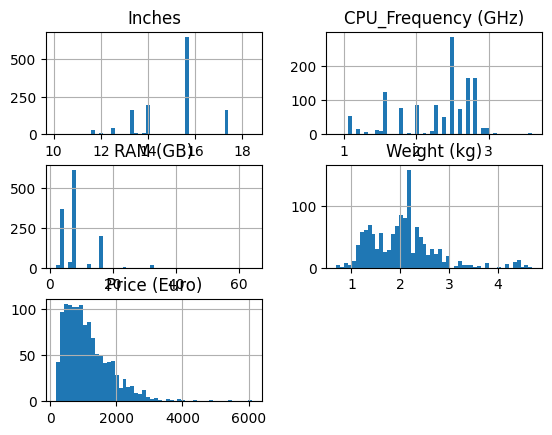

In [17]:
plt.figure(figsize=(15,15))
df.hist(bins=50)
plt.show()

In [26]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1048
No OS,66
Linux,58
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [27]:
df['Weight (kg)'].value_counts()

,count
Weight (kg),
2.20,120
2.10,58
2.00,45
2.40,42
2.50,38
...,...
4.50,1
1.14,1
3.80,1


In [28]:
df.head(3)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
